# Introduction

In this notebook we will open and manipulate two datasets
* a shapefile (extension ```.shp```) of the geologic units of Colorado.
* a Google Earth Keyhole Markup Language file (extension ```.kml```) containing all reported mineral deposits known within Colorado

Here our goal is to examine how lithology controls the distribution of Gold, Silver, and Copper within the famous Colorado Mineral Belt.

# Background

Edited from [Wikipedia](https://en.wikipedia.org/wiki/Colorado_Mineral_Belt)

The Colorado Mineral Belt (CMB) is an area of ore deposits from the La Plata Mountains in Southwestern Colorado to near the middle of the state at Boulder, Colorado and from which over 25 million troy ounces (778 t) of gold were extracted beginning in 1858. The belt is a northeast-striking zone defined by: 

* A shear zone system aged 2500Ma to 541Ma.

* Anomalous concentrations of chalcophile and siderophilic elements.

* A major gravity low

* And abnormal heat flow considering its location over thick continental crust

The belt lies within a zone that has been geologically active at intervals beginning from at least 1.6 billion years ago until the present. Parts of the CMB follow shear zones of Precambrian through Mesozoic age (>541-65 Ma). Igneous rocks intruded about 60 to 70 million years ago during the Laramide orogeny are associated with the belt and once were thought to be responsible for most of the ore deposits. Now many of the important ore deposits are thought to be genetically related to younger magmatism, some as young as ~25 million years.

# Prerequesite Python Packages

In addition to ```Numpy```,```Pandas```, and ```matplotlib```, you will need the package ```geopandas```. ```geopandas``` is a popular package for manipulating geospatial point and polygon data and can be used to create publication quality images. To install all the above packages, activate the environment using ```activate <environment>```(Windows) or ```source activate <environment>``` (Mac/Linux) after you have installed [miniconda3](https://docs.conda.io/en/latest/miniconda.html) some additional setup might be needed if Powershell or terminal doesn't automatically recognize your commands. 

Files can be read in using the relative path to where this notebook is located. For example, if your directory structure is like:

**module_1**

   vv
   
"**COgeol_dd**"  "*Investigating the Colorado Mineral Belt.ipynb*"  

   vv
   
"*cogeol_dd_polygon.shp*"

then you can use the string ```COgeo_dd/cogeo_dd_polygon.shp``` to refer to the relative file location. Note that ```.shp``` files have associated other file types (```.sbx```,```.shx``` etc;) that must exist in the same folder as ```.shp``` for you to use the shapefile.

# Help me! I'm stuck and I can't get up.

Rather than giving you the answers, use these following examples to load your datasets:

**Loading kml file**:
```python
import geopandas as gpd

gpd.io.file.fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
geopandas_frame = gpd.read_file('my_kml_file.kml', driver='LIBKML')
```

**Loading geopandas dataframe shapefile using geopandas' ```read_file()``` method**
```python

import geopandas as gpd

geologic_units = gpd.read_file("COgeol_dd/cogeol_dd_polygon.shp")  
```
[reference](https://geopandas.org/docs/user_guide/io.html)

**Listing Available Columns via the ```columns``` property**
```python
list_of_unique_values = my_dataframe.columns

```

[reference](https://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers)

**Listing Unique Values in a Column via the ```unique()``` method**
```python
list_of_unique_values = my_dataframe['column_name'].unique()

```

[reference](https://www.statology.org/pandas-unique-values-in-column/)

**Only keep Desired Records Matching String using the ```.isin``` method**

```python
list_of_values_i_want = ['val1','val2','val3',
                         'val4','val5']

subset_frame = my_dataframe[my_dataframe['column_name'].isin(list_of_values_i_want)]

```

[reference](https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values)

**Plot a simple Geopandas Frame using a matplotlib pyplot**

```python
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(20, 10))
my_gpd_frame.plot(linewidth=0.8, ax=ax, color='black',zorder=3)
plt.show()
```
[reference](https://geopandas.org/docs/user_guide/mapping.html)

**Search for substring within field with optional match case argument**

```python
sub_frame = df[df['column name'].str.contains("substring", case=False)]
```

**plot scattered data with ```matplotlib```**

```python
# using simple arrays:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_array,y_array,**optional_arguments)
plt.show()

# using geopandas
fig, ax = plt.subplots(1, figsize=(20, 10))
my_df.plot(ax=ax,markersize=4,marker='*',color='gold',zorder=4
             ,label='my_label')
plt.legend()
plt.show()
```

[reference](https://matplotlib.org/3.3.3/gallery/shapes_and_collections/scatter.html)

If you have questions that can't be answered at the above links try [stackoverflow](stackoverflow.com) or a general google search for ```<your question> python```. Note that python and the open source packages you use often undergo non-backwards compatible updates, so make strategic use of google's search tools.
# Your Mission Should You Choose to Accept

**For the shapefile**

 1) Load it! print out the frame
 
 2) Explore what kinds of unique values live in each column.
 
 2) Make a sub dataframe containing only igneous rocks. Then, make several sub frames from this sub frame by grouping relevant ages.
 
 3) Plot those units with matplotlib
 
 **For the kml file**
 
 1) Load it! print out the frame
 
 2) Find the field which has information about what minerals correspond to the occurence. Make a sub dataframe with only gold, silver and copper mineral occurences. 
 
 3) Plot it over the first figure
 
For pandas dataframes, you may want to examine what kinds of columns and what kinds of fields exist in each column. to do this, use the .columns and .unique() operator. For example:
```python
import geopandas as gpd

my_dataframe = geopandas.load('some_file.shp')

print(my_dataframe.columns())

print(my_dataframe['Unit_Age'].unique())
```

In [18]:
## shapefile

import matplotlib.pyplot as plt

import geopandas as gpd

# try to  make these ages be old (>298Ma)
age_list_1 = ['Early Proterozoic','Cretaceous-Jurassic', 'Permian-Pennsylvanian',
       'Middle Proterozoic','Late Archean', None, 'Mississipian', 'Pennsylvanian',
       'Cambrian', 'Mississipian-Cambrian', 'Permian','Mississippian-Cambrian', 
       'Devonian-Ordivician','Ordovician-Cambrian', 'Devonian-Cambrian',
       'Early-Middle Proterozoic', 'Mississippian-Ordovician','Ordovician']
# try to  make these ages be intermediate (298-60Ma)
age_list_2 = ['Triassic-Permian','Triassic','Lower Cretaceous-Triassic',
              'Jurassic-Triassic','Mesozoic-Pennsylvanian','Jurassic','Tertiary-Cretaceous',
              'Triassic-Pennsylvanian']
# try to make this age list correspond to the Cenozoic
age_list_3 = ['Tertiary','Tertiary-Cretaceous','Cretaceous']

# sub list of igneous rocks
valid_rocks = ['gabbro','granite','felsic gneiss','plutonic rock (phaneritic)',
       'intermediate volcanic rock','biotite gneiss',
       'basalt', 'rhyolite', 'granitoid','andesite', 'diabase']



In [19]:
geologic_units = gpd.read_file("COgeol_dd/cogeol_dd_polygon.shp")  

In [20]:
igneous_units = geologic_units[geologic_units['ROCKTYPE1'].isin(valid_rocks)]

old_units          = igneous_units[igneous_units['UNIT_AGE'].isin(age_list_1)]
intermediate_units = igneous_units[igneous_units['UNIT_AGE'].isin(age_list_2)]
new_units          = igneous_units[igneous_units['UNIT_AGE'].isin(age_list_3)]


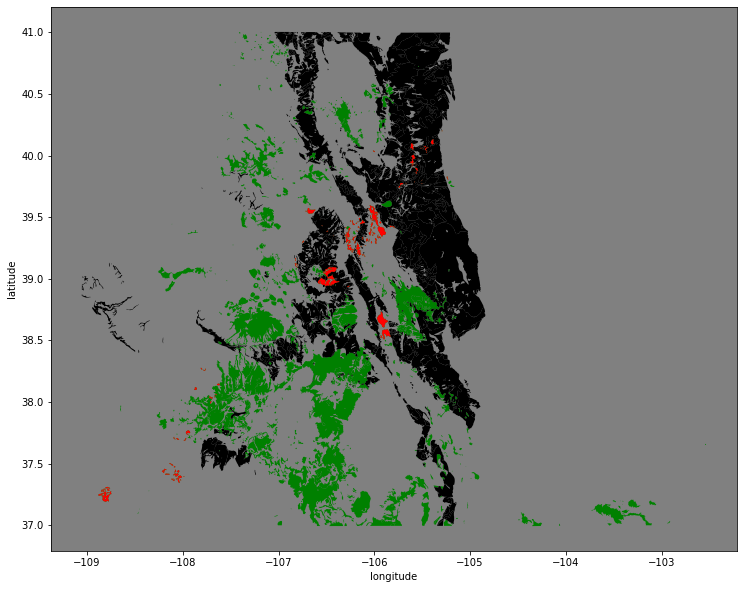

In [21]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.set_facecolor('grey')
old_units.plot(linewidth=0.8, ax=ax, color='black',zorder=3)
intermediate_units.plot(linewidth=0.8, ax=ax, color='red',zorder=2)
new_units.plot(linewidth=0.8, ax=ax, color='green',zorder=1)

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [4]:
gpd.io.file.fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
mineral = gpd.read_file('mrds-Colorado.kml', driver='LIBKML')

In [5]:
gold_df   = mineral[mineral['description'].str.contains("gold", case=False)]
silver_df = mineral[mineral['description'].str.contains("silver", case=False)]
copper_df = mineral[mineral['description'].str.contains("copper", case=False)]

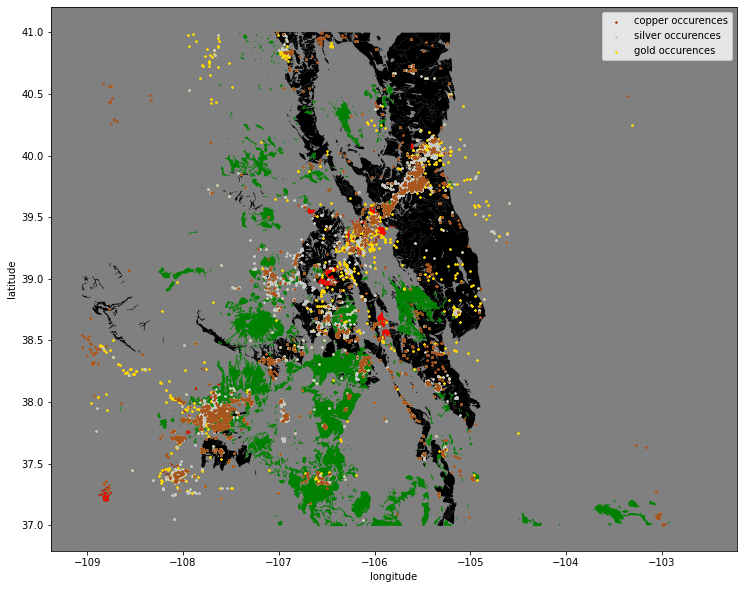

In [7]:
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.set_facecolor('grey')
old_units.plot(linewidth=0.8, ax=ax, color='black',zorder=3)
intermediate_units.plot(linewidth=0.8, ax=ax, color='red',zorder=2)
new_units.plot(linewidth=0.8, ax=ax, color='green',zorder=1)

copper_df.plot(ax=ax,markersize=4,marker='*',color='xkcd:sienna',zorder=6
              ,label='copper occurences')
silver_df.plot(ax=ax,markersize=4,marker='*',color='xkcd:silver',zorder=5
              ,label='silver occurences')
gold_df.plot(ax=ax,markersize=4,marker='*',color='gold',zorder=4
             ,label='gold occurences')

plt.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()